# Lab Overview

## Introduction
- Assume a neural network composed of three layers of neurons: input layer, hidden layer and output layer. We wish to train this network so when it is presented with a specific input it will have a certain output.
- For this lab we are going to work with the [MNIST database of handwritten digits](http://yann.lecun.com/exdb/mnist) and train our network to recognise handwritten 0-9 digits. The MNIST database contains 60000 images which can used to train the network and 10000 more images for testing purposes. Each image is an  matrix representing a digit.

<img src="Lab1_NetworkScheme.jpg" width="800" height="600">

## The neural network

### Network initialisation


1. Generate a set of weights between the input and the hidden layer. The input layer should have 784 neurons, one for each pixel of the image.

2. Generate a set of weights between the hidden and the output layer. The output layer should have 10 neurons, one for each digit.

3. Generate two sets of bias, one for the hidden layer and one for the output layer. Bias is set to 0 to start with 


### Feedforward


1. Feed an image $\vec{x(\mu)}$ to the network,
   

2. Compute the input to each of the neurons of the hidden layer, $h^{(1)}_i = \sum_{i=1}^{784}w^{(1)}_{ij} x^{(0)}_j + b^{(1)}_i$ and their outputs with the use of the [sigmoid function](http://mathworld.wolfram.com/SigmoidFunction.html),$x^{(1)}_i = f(h^{(1)}_i) = \frac{1}{(1+e^{-h^{(1)}_i})}$.

3. Repeat for the output layer, $h^{(2)}_i = \sum_{i=1}^{784}w^{(2)}_{ij} x^{(1)}_j + b^{(2)}_i$ and their outputs, $x^{(2)}_i = f(h^{(2)}_i)$

<img src="nn2.jpg"  width="800" height="600">


### Error

1. Calculate the error in the output of the neural network. If the input is an image of a zero digit it is expected that the first neuron of the input layer to be fully active, i.e has an output of 1, while the other neurons have outputs of 0. Thus the target output would be $t = [1,0,0,\dots,0]^T$ and, given that the output of the neural network is some $output$, the error is given by the formula $$E(\mu) = \sum_{i=1}^{n}\frac{1}{2}(t_i(\mu)-x^{(2)}_i(\mu))^2,$$ where $n$ is the number of neurons in the output layer of the network and $\mu$ is sample index. The total error per sample is then given by $$E/N = \sum_{\mu=1}^N \sum_{i=1}^{n}\frac{1}{2N}(t_i(\mu)-x^{(2)}_i(\mu))^2.$$



### Backpropagation
Here we will consider explicitly the logistic sigmoid activation function so we can use the result that the derivative of the logistic sigmoid is
$$ f'(h) = \frac{\partial f(h) }{\partial h } = f(h)(1-f(h)) $$ directly in the update rules.

1. Apply the delta rule between the output and the hidden layers. For the weight $w_{ij}$ we have 

$$\frac{\partial E}{\partial w_{\textrm{ij}} }=\frac{\partial E}{\partial x^{(2)}_i }\;\frac{\partial x^{(2)}_i }{\partial h^{(2)}_i } \; \frac{\partial h^{(2)}_i }{\partial w_{\textrm{ij}} } \; =-\left( t_i -x^{(2)}_i \right)\; x^{(2)}_i \;\left(1-x^{(2)}_i \right) \; x^{(1)}_j,$$ 

and we can define  $\delta^{(2)}_i = \left(t_i - x^{(2)}_i \right)x^{(2)}_i \;\left(1-x^{(2)}_i \right) $.

2. Update the weights between the hidden and the output layers.  For the weight $w_{ij}$ we have the update after a single input $${\Delta w}_{\textrm{ij}} = \eta \delta^{(2)}_i x^{(1)}_j.$$

3. Repeat steps 1 and 2 between the hidden and the input layes and update the weights between them. Here for the weight $w_{ij}$ we have 
$$\frac{\partial E}{\partial w_{\textrm{ij}} }=\frac{\partial E}{\partial x^{(1)}_j }\;\frac{\partial x^{(1)}_j }{\partial h^{(1)}_j }\;\frac{\partial h^{(1)}_j }{\partial w_{\textrm{ij}} }
=x^{(0)}_j x^{(1)}_i \;\left(1-x^{(1)}_i \right) \sum_k \left(w^{(2)}_{\textrm{ki}} \delta^{(2)}_k \right),$$ where the terms $w_{\textrm{ij}}^{\left(2\right)}, \delta_j^{\left(2\right)}$ are the weights and the delta function of the previous layer. So now we can defined the backpropagated local gradient for the hidden layer as
$$ \delta_i^{(1)} = x^{(1)}_i \;\left(1-x^{(1)}_i \right) \sum_j \delta^{(2)}_j w^{(2)}_{ji}. $$

4. Update the weights between the hidden and the input layers. For the weight $w_{ij}$ we have $${\Delta w}_{\textrm{ij}} =\eta \delta^{(1)}_i x^{(0)}_j.$$


## Exercises

The code provided first loads the MNIST database and generates a neural network using the parameters provided. Then it trains the network and tests it using the testing set of the MNIST database.

1. Test the network using the test dataset, then compute and comment on it's accuracy.


2. The weights are generated from a uniform distribution in the interval (0,1) and are then normalized using the sum equals to 1 normalization, i.e the summation of the inputs should be equal to 1. Why is this normalization important? Another initialisation method is the [Xavier initialization](http://www.jmlr.org/proceedings/papers/v9/glorot10a/glorot10a.pdf?hc_location=ufi), which is more commonly used in deep neural networks of more than one hidden layer. In this initialisation the weights are initialised using normally distributed random numbers which are then scaled by sqrt(1/n_cols). Change your initialisation to this and comment on how this changes the training.


3. The weights are updated through mini-batches. Change the mini-batch size and see the effect that this has on performance and
   computational speed. What are the limits in defining a mini-batch size?


4. A bias is included in the calculation of the activation but is set to zero and is not trained. Derive the learning rule and code the training of the bias alongside the weights. It may help to think of the bias as an extra weight where the input value is fixed to 1.


5. Upgrade the network by adding one more hidden layer, derive the appropriate formulas for the feedforward and the backpropagation and program them.


6. Try to use ten classes and to optimise the network hyperparameters.

In [12]:
import numpy as np
import numpy.matlib 
import math
import matplotlib.pyplot as plt
import csv

In [29]:
# Load the MNIST dataset:
#     The MNIST dataset contains 60,000 training samples.
#     To start with we will limit this to 5 classes (the first 5 digits in the dataset) to simplify development
#     Reading the data file gives an array of img_size by no. of samples
#     so we will work on the transposed array instead 

from scipy.io import loadmat

mnist = loadmat('MNIST.mat')

# Read the train set
x_train = mnist['x_train']
# Read the train labels
trainlabels = mnist['trainlabels']

# Read the test set
x_test = mnist['x_test']
# Read the test labels
testlabels = mnist['testlabels']

#We select the data for three classes that we want to classify

N_class=5

Index_tr=[]
Index_te=[]

for i in range(N_class):
    
    #Find the indexes of the training set corresponding to class i
    ind_tr=np.where(trainlabels==i)[0]
    #Find the indexes of the test set corresponding to class i
    ind_te=np.where(testlabels==i)[0]
    
    # Append the training indexes in a list
    Index_tr.append(ind_tr)
    # Append the testing indexes in a list
    Index_te.append(ind_te)

# Reshape the lists to be a 1-d array    
Index_tr=np.concatenate(Index_tr,axis=0)
Index_te=np.concatenate(Index_te,axis=0)

# Create a training set and a test set with data belonging to the classes considered only
x_train=np.copy(x_train[Index_tr,:])
x_test=np.copy(x_test[Index_te,:])

# Compute the size of the train and test datasets
N_tr=np.shape(Index_tr)[0]
N_te=np.shape(Index_te)[0]

# Create one-hot encoding labels for train and test datasets
y_train=np.zeros([N_tr,N_class])
y_test=np.zeros([N_te,N_class])

for i in range(N_tr):
    
    y_train[i,int(trainlabels[Index_tr[i]])]=1

for i in range(N_te):

    y_test[i,int(testlabels[Index_te[i]])]=1

    
n_samples, img_size = x_train.shape


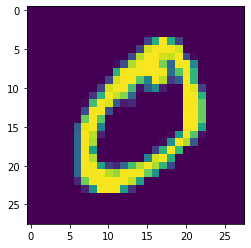

In [30]:
# Example of image, take the transpose to see it in the right orientation
example_image=np.reshape(x_train[0],(28,28))
plt.imshow(example_image.T)
plt.show()

Note on Batch size: On decreasing batch size, training time is increasing but accuracy is increasing. I decided to keep mini-batch size to be 8 since it is not too slow and still have good accuracy.

In [43]:
# The number of epochs is a hyperparameter that defines the number times that the learning algorithm 
# will work through the entire training dataset.

# The batch size is a hyperparameter that defines the number of samples to work through before 
# updating the internal model parameters. 

# ref: https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/

n_epoch = 10
batch_size = 8
n_batches = int(math.floor(n_samples/batch_size))

# define the size of each of the layers in the network
n_input_layer  = img_size
n_hidden_layer = 100
n_output_layer = N_class

# Add another hidden layer
n_hidden_layer2 = 100 # number of neurons of the hidden layer. 0 deletes this layer

# eta is the learning rate
eta = 0.5

In [44]:
# Initialize a simple network
# For W1 and W2 columns are the input and the rows are the output.
# W1: Number of columns (input) needs to be equal to the number of features 
#     of the  MNIST digits, thus p. Number of rows (output) should be equal 
#     to the number of neurons of the hidden layer thus n_hidden_layer.
# W2: Number of columns (input) needs to be equal to the number of neurons 
#     of the hidden layer. Number of rows (output) should be equal to the 
#     number of digits we wish to find (classification).
xavier_init = True
if xavier_init:
    W1 = np.random.rand(n_hidden_layer, n_input_layer) * np.sqrt(1/n_input_layer)
    
    if n_hidden_layer2 > 0:
        W2 = np.random.rand(n_hidden_layer2, n_hidden_layer) * np.sqrt(1/n_hidden_layer)
        W3 = np.random.rand(n_output_layer, n_hidden_layer2) * np.sqrt(1/n_hidden_layer2)
    else:
        W2 = np.random.rand(n_output_layer, n_hidden_layer) * np.sqrt(1/n_hidden_layer)
else:
    W1 = np.random.uniform(0,1,(n_hidden_layer, n_input_layer))
    W2 = np.random.uniform(0,1,(n_output_layer, n_hidden_layer))

    # The following normalises the random weights so that the sum of each row =1
    W1 = np.divide(W1,np.matlib.repmat(np.sum(W1,1)[:,None],1,n_input_layer))
    W2 = np.divide(W2,np.matlib.repmat(np.sum(W2,1)[:,None],1,n_hidden_layer))

    if n_hidden_layer2 > 0:
        W3 = np.random.uniform(0,1,(n_output_layer, n_hidden_layer2))
        W3 = np.divide(W1,np.matlib.repmat(np.sum(W1,1)[:,None],1,n_hidden_layer2))
        W2 = np.random.uniform(0,1,(n_hidden_layer2, n_hidden_layer))
        W2 = np.divide(W2,np.matlib.repmat(np.sum(W2,1)[:,None],1,n_hidden_layer))

In [45]:
# Initialize the biases
bias_W1 = np.zeros((n_hidden_layer,))
bias_W2 = np.zeros((n_output_layer,))
if n_hidden_layer2 > 0:
    bias_W3 = np.zeros((n_output_layer,))
    bias_W2 = np.zeros((n_hidden_layer2,))

In [46]:
# Keep track of the network inputs and average error per epoch
errors = np.zeros((n_epoch,))

In [47]:
# Train the network

for i in range(0,n_epoch):

    # We will shuffle the order of the samples each epoch
    shuffled_idxs = np.random.permutation(n_samples)
    
    for batch in range(0,n_batches):
        
        # Initialise the gradients for each batch
        dW1 = np.zeros(W1.shape)
        dW2 = np.zeros(W2.shape)

        dbias_W1 = np.zeros(bias_W1.shape)
        dbias_W2 = np.zeros(bias_W2.shape)

        if n_hidden_layer2 > 0:
            dW3 = np.zeros(W3.shape)
            dbias_W3 = np.zeros(bias_W3.shape)
    
        # Loop over all the samples in the batch
        for j in range(0,batch_size):

            # Input (random element from the dataset)
            idx = shuffled_idxs[batch*batch_size + j]
            x0 = x_train[idx]
            
            # Neural activation: input layer -> hidden layer
            h1 = np.dot(W1,x0)+bias_W1

            # Apply the sigmoid function
            x1 = 1/(1+np.exp(-h1))

            # Neural activation: hidden layer -> output layer
            h2 = np.dot(W2,x1)+bias_W2

            # Apply the sigmoid function
            x2 = 1/(1+np.exp(-h2))
            # Form the desired output, the correct neuron should have 1 the rest 0
            desired_output = y_train[idx]
            
            if n_hidden_layer2 > 0:
                h3 = np.dot(W3, x2) + bias_W3
                x3 = 1/(1+np.exp(-h3))
                
                # Compute the error signal
                e_n = desired_output - x3
                
                # Backpropagation: output layer -> hidden layer2
                delta3 = x3*(1-x3)*e_n
                dW3 += np.outer(delta3,x2)
                dbias_W3 += delta3
                
                # Backpropagation: hidden layer2 -> hidden layer
                delta2 = x2*(1-x2) * np.dot(W3.T, delta3)
                
            else:
                # Compute the error signal
                e_n = desired_output - x2

                # Backpropagation: output layer -> hidden layer
                delta2 = x2*(1-x2) * e_n

            dW2 += np.outer(delta2, x1)
            dbias_W2 += delta2

            # Backpropagation: hidden layer -> input layer
            delta1 = x1*(1-x1) * np.dot(W2.T, delta2)
            dW1 += np.outer(delta1,x0)
            dbias_W1 += delta1

            # Store the error per epoch
            errors[i] = errors[i] + 0.5*np.sum(np.square(e_n))/n_samples

        # After each batch update the weights using accumulated gradients
        W2 += eta*dW2/batch_size
        W1 += eta*dW1/batch_size
    
        bias_W1 += eta*dbias_W1/batch_size
        bias_W2 += eta*dbias_W2/batch_size
        
        if n_hidden_layer2 > 0:
            W3 += eta*dW3/batch_size
            bias_W3 += eta*dbias_W3/batch_size
        
    print( "Epoch ", i+1, ": error = ", errors[i])

Epoch  1 : error =  0.40139199504086837
Epoch  2 : error =  0.08948289620508193
Epoch  3 : error =  0.02686328870876849
Epoch  4 : error =  0.022464737592535387
Epoch  5 : error =  0.019451468114737865
Epoch  6 : error =  0.016938270476553653
Epoch  7 : error =  0.01511798567336655
Epoch  8 : error =  0.013458967539702878
Epoch  9 : error =  0.012151010883024324
Epoch  10 : error =  0.010993989665701621


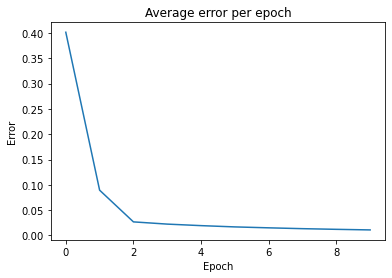

In [48]:
# Plot the performance
plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Average error per epoch')
plt.show()

In [49]:
# Test the dataset and find the accuracy
num_test = x_test.shape[0]
predicted_labels = np.zeros(num_test)
actual_labels = np.zeros(num_test)
correctly_classified = 0
for idx in range(0, num_test):
    x0 = x_test[idx]        
    # Neural activation: input layer -> hidden layer
    h1 = np.dot(W1,x0)+bias_W1

    # Apply the sigmoid function
    x1 = 1/(1+np.exp(-h1))

    # Neural activation: hidden layer -> output layer
    h2 = np.dot(W2,x1)+bias_W2

    # Apply the sigmoid function
    x2 = 1/(1+np.exp(-h2))
    if n_hidden_layer2 > 0:
        h3 = np.dot(W3,x2)+bias_W3
        x3 = 1/(1+np.exp(-h3))
        predicted_labels[idx] = np.argmax(x3)
    else:
        predicted_labels[idx] = np.argmax(x2)

    actual_labels[idx] = np.argmax(y_test[idx])
    if predicted_labels[idx] == actual_labels[idx]:
        correctly_classified += 1

accuracy = correctly_classified*100/num_test
print(accuracy)

98.65732632807939
